In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris, load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris (1).csv to iris (1).csv


In [ ]:
df = pd.read_csv('iris (1).csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


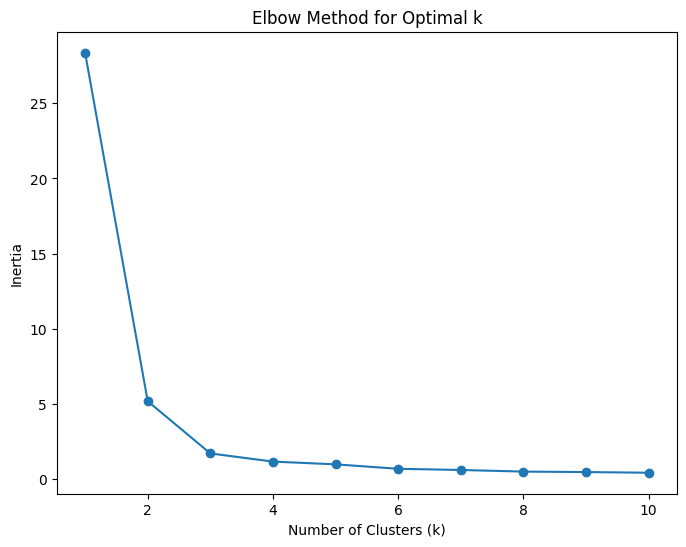

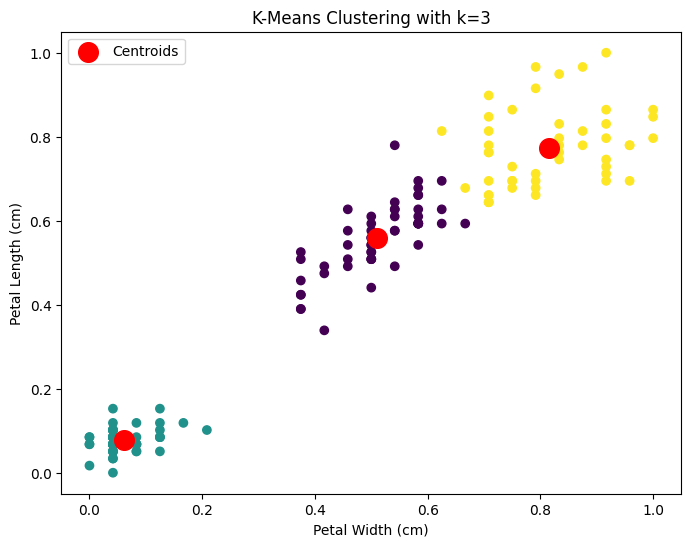

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Select petal width and length features
df = df[['petal width (cm)', 'petal length (cm)', 'target']]

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
df[['petal width (cm)', 'petal length (cm)']] = scaler.fit_transform(df[['petal width (cm)', 'petal length (cm)']])

# Calculate inertia (sum of squared distances to the nearest cluster center) for different k values
inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(df[['petal width (cm)', 'petal length (cm)']])
  inertia.append(kmeans.inertia_)

# Plot the elbow plot to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow plot, choose the optimal k value (e.g., k=3 in this case)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['petal width (cm)', 'petal length (cm)']])

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['petal width (cm)'], df['petal length (cm)'], c=df['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.legend()
plt.show()

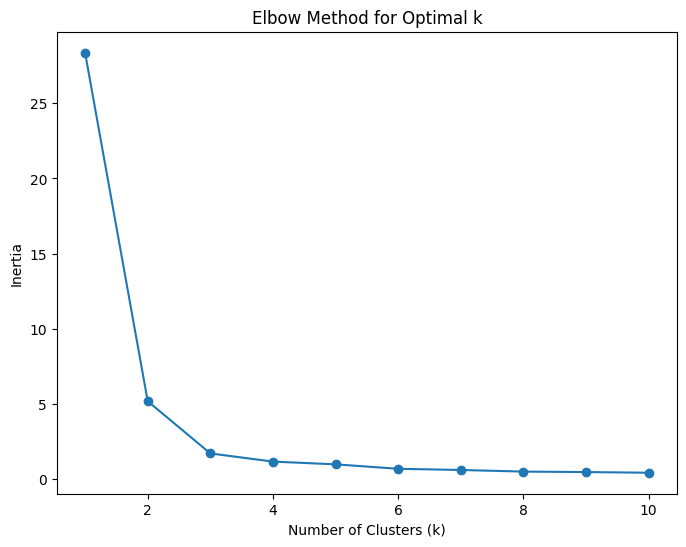

In [ ]:

inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(df[['petal width (cm)', 'petal length (cm)']])
  inertia.append(kmeans.inertia_)

# Plot the elbow plot to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#optimal_k = 3